In [72]:
import pandas as pd
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
%matplotlib inline

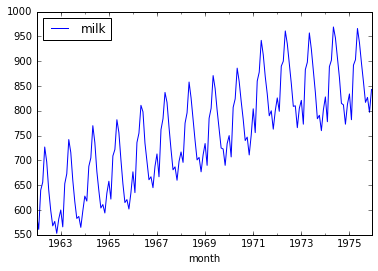

In [4]:
milk.plot()

In [9]:
import statsmodels.api as sm


In [20]:
milk.values.T[0]

array([589, 561, 640, 656, 727, 697, 640, 599, 568, 577, 553, 582, 600,
       566, 653, 673, 742, 716, 660, 617, 583, 587, 565, 598, 628, 618,
       688, 705, 770, 736, 678, 639, 604, 611, 594, 634, 658, 622, 709,
       722, 782, 756, 702, 653, 615, 621, 602, 635, 677, 635, 736, 755,
       811, 798, 735, 697, 661, 667, 645, 688, 713, 667, 762, 784, 837,
       817, 767, 722, 681, 687, 660, 698, 717, 696, 775, 796, 858, 826,
       783, 740, 701, 706, 677, 711, 734, 690, 785, 805, 871, 845, 801,
       764, 725, 723, 690, 734, 750, 707, 807, 824, 886, 859, 819, 783,
       740, 747, 711, 751, 804, 756, 860, 878, 942, 913, 869, 834, 790,
       800, 763, 800, 826, 799, 890, 900, 961, 935, 894, 855, 809, 810,
       766, 805, 821, 773, 883, 898, 957, 924, 881, 837, 784, 791, 760,
       802, 828, 778, 889, 902, 969, 947, 908, 867, 815, 812, 773, 813,
       834, 782, 892, 903, 966, 937, 896, 858, 817, 827, 797, 843], dtype=int64)

In [22]:
res = sm.tsa.stattools.adfuller(milk.values.T[0])

In [23]:
res

(-1.3038115874221288,
 0.62742670860303196,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [100]:
milk.head()

,milk,days,avg
month,,,
1962-01-01,589,31,NaN
1962-02-01,561,28,NaN
1962-03-01,640,31,NaN
1962-04-01,656,30,NaN
1962-05-01,727,31,NaN


In [93]:
milk.index[0].days_in_month

31

In [94]:
milk['days'] = milk.apply(lambda row: row.index.days_in_month)

In [112]:
def f(x):
    return x[0] / float(x[1])    

In [113]:
milk['avg'] = milk.apply(f, axis=1)

In [114]:
milk.head()

,milk,days,avg
month,,,
1962-01-01,589,31,19.000000
1962-02-01,561,28,20.035714
1962-03-01,640,31,20.645161
1962-04-01,656,30,21.866667
1962-05-01,727,31,23.451613


In [115]:
milk['avg'].sum()

4166.326661899465

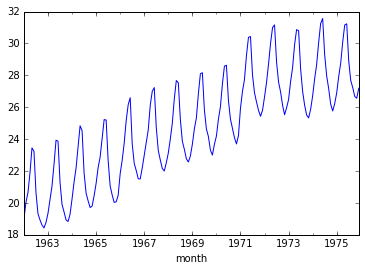

In [116]:
milk['avg'].plot()

In [119]:
sm.tsa.stattools.adfuller(milk['avg'])

(-1.1798216373266124,
 0.68221515130814048,
 12,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.5708067458066353)

In [123]:
milk['avg1'] = milk.avg - milk.avg.shift(1)

In [124]:
milk.head()

,milk,days,avg,avg1
month,,,,
1962-01-01,589,31,19.000000,NaN
1962-02-01,561,28,20.035714,1.035714
1962-03-01,640,31,20.645161,0.609447
1962-04-01,656,30,21.866667,1.221505
1962-05-01,727,31,23.451613,1.584946


In [126]:
sm.tsa.stattools.adfuller(milk['avg1'][1:])

(-2.7594694762289222,
 0.064300546541745177,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.1539973381055688)

In [127]:
milk['avg12'] = milk.avg - milk.avg.shift(12)

In [128]:
milk.head()

,milk,days,avg,avg1,avg12
month,,,,,
1962-01-01,589,31,19.000000,NaN,NaN
1962-02-01,561,28,20.035714,1.035714,NaN
1962-03-01,640,31,20.645161,0.609447,NaN
1962-04-01,656,30,21.866667,1.221505,NaN
1962-05-01,727,31,23.451613,1.584946,NaN


In [129]:
sm.tsa.stattools.adfuller(milk['avg12'][12:])

(-2.1594860932888071,
 0.22127672658830397,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [130]:
milk['avg13'] = milk.avg12 - milk.avg12.shift(1)

In [132]:
sm.tsa.stattools.adfuller(milk['avg13'][13:])

(-5.4813263347969254,
 2.2808455518037555e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.905137509892427)

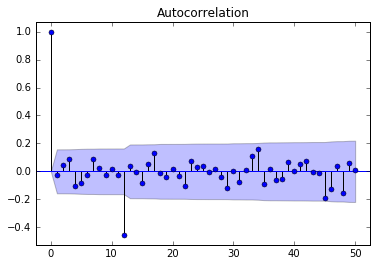

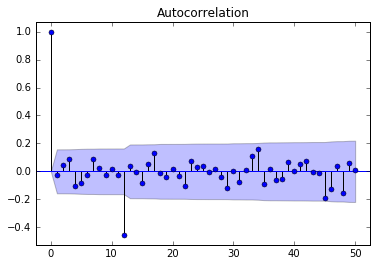

In [133]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk['avg13'][13:].values.squeeze(), lags=50)

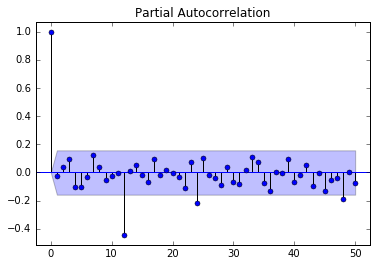

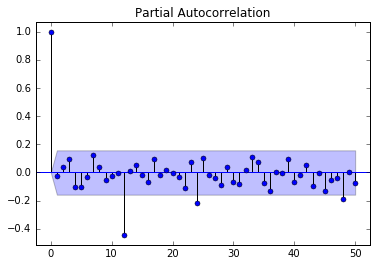

In [134]:
sm.graphics.tsa.plot_pacf(milk['avg13'][13:].values.squeeze(), lags=50)